### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    
    (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
    
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import plotly.express as px
os.system('pwd')
pd.set_option('display.max_columns', None)

/home/akyachtsman/mod5


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


# Begin data analysis:

In [44]:
fig = px.pie(data, names = 'destination', title= "Breakdown of driver destinations")
fig.show()

In [8]:
px.pie(data, names = 'destination', values = 'Y', title= "Percentage of acceptance based on Destination")

CONCLUSION: Drivers are more likely to accept coupons when then have "no urgent place" to go to according the above pie charts.

<AxesSubplot:xlabel='Y', ylabel='coupon'>

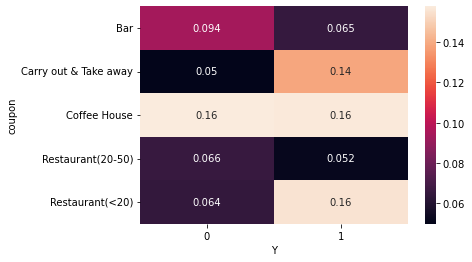

In [9]:
pd.crosstab(data['coupon'], data['Y'], normalize = True, margins=True)
sns.heatmap(pd.crosstab(data['coupon'], data['Y'], normalize = True), annot = True)

CONCLUSIONS:
1) The most presented coupon (30% of total) was for coffee house and approx. 50% were accepted!
2) Of the total coupons presented, restaurants(<20) was about 22% of total but majority (71%) were accepted. Therefore, the total coupons accepted for coffee houses and restaurants(<20) were approx. equal!
3) Bar coupons and restaurants(20-50) had lowest percentage of acceptance rates!

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#focus on car...most are null values
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

CONCLUSION: Car values are sparse and therefore inconsequential for our analysis so we can REMOVE!

In [11]:
#Remove car data...
data = data.drop(columns = 'car', axis= 1)

In [12]:
#get picture of null values...
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [13]:
#covert rest of NaN's to zeros...
data = data.fillna(0)
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [14]:
#clean up age data...
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [15]:
#Convert age data to integer for ease of analysis and visualization...
data['age'] = data['age'].str.replace("50plus", "51").str.replace("below21", "20")
data['age'] = pd.to_numeric(data['age'])
data['age'].sum()

411437

CONCLUSION: All null values are either dropped or replaced by zeros to more effectively analyze the data

In [16]:
data['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

CONCLUSION: Drivers with NO children in cars are MORE likely to accept coupons

4. What proportion of the total observations chose to accept the coupon? 



In [17]:
#get coupon acceptance stats....
data['Y'].value_counts(normalize= True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

CONCLUSION: From the above analysis, we can see that majority (57%) used the coupon offer 

5. Use a bar plot to visualize the `coupon` column.

In [18]:
px.bar(pd.crosstab(data['coupon'], data['Y']), title = "Bar plot of total coupons that were presented", 
       labels= {"coupon": "type of coupons"})

CONCLUSION: Most presented coupons were for coffee house, then casual restaurants and finally carry out. The least presented coupon was for full service restaurants

In [19]:
px.bar(pd.crosstab(data['education'], data['Y']), title = "Bar plot of total coupons that were presented", 
       labels= {"coupon": "type of coupons"})

In [20]:
data[data['education'] == "Some High School"][['Y']].value_counts(normalize=True)

Y
1    0.715909
0    0.284091
dtype: float64

CONCLUSION: No significant difference in level of acceptance between levels of education except with "some high school" education. In most categories, a little over majority accepted the coupon. However, in "some high school" category, 72% accepted the coupon.

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

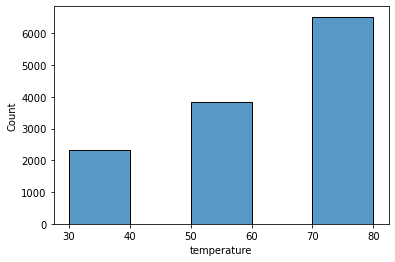

In [21]:
sns.histplot(data["temperature"], bins = 5)

In [22]:
px.bar(pd.crosstab(data['temperature'], data['Y']), title = "Bar plot of the temperature")

In [23]:
data.query('temperature == 80')['Y'].value_counts(normalize = True)

1    0.600337
0    0.399663
Name: Y, dtype: float64

CONCLUSION: The ratio of coupon acceptance is more pronounced with the highest temperature of 80 degrees (60%).

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
#limit dataframe to bar coupons...
bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [25]:
#percentage of acceptance: 41%
bar['Y'].value_counts(normalize= True)

0    0.589985
1    0.410015
Name: Y, dtype: float64

CONCLUSION: 41% of the bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [26]:
#acceptance rate of those who went to the bar fewer or equal to 3 times per month is 90%!
bar['Bar'].value_counts(normalize = True)[['never', 'less1', '1~3']].sum()

0.8909271194843826

In [27]:
#acceptance rate of those who went to the bar fewer or equal to 3 times per month is 90%!
bar['Bar'].value_counts(normalize = True)[[ "4~8" , "gt8"]].sum()

0.09866137828458106

CONCLUSION: 
    
1) Great majority (89%) of drivers who went to the bar fewer or equal to 3 times per month accepted the coupon!
2) Only 10% of drivers who went to the bar more than 3 times per month accepted the coupon!

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


# Bar frequency and age:

Analyze the relationship between frequenting the bar per month and age and how it's related to acceptance of coupons. 

In [28]:
#categorize to sort frequent categories from 'never' to 'gt8')
bar_cat = pd.Categorical(bar['Bar'],
    categories= [0, 'never', 'less1', '1~3', '4~8', 'gt8'])
#group bar dataframe by age and frequency of patronizing a bar 
bar_age_grp = bar.groupby([bar['age'], bar_cat]).count()
bar_age_grp[['Y']].reset_index()
#make sure no data was lost...
print(bar['Bar'].value_counts().sum(), ' ', bar_cat.value_counts().sum())

2017   2017


In [29]:
#bar_age_grp[['Y']].reset_index()

In [30]:
#scatter plot....
px.scatter(bar_age_grp[['Y']].reset_index(), x= 'age', y= 'level_1', size= 'Y',
           title= 'Plot of frequenting a bar as a function of age and size of circle as acceptance rate of a coupon', 
           labels={"level_1": "Monthly frequency of going to a bar","age": "Age of participant"})

In [31]:
#another analysis of the bar data using heat map of the same data in crosstab format...
bar_age_cross = pd.crosstab(bar['Bar'],bar['age'])

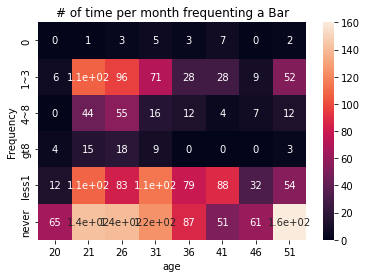

In [32]:
#Use heatmap to show relationship between age, frequency of going to a bar and coupon acceptance...
sns.heatmap(bar_age_cross,annot = True)
plt.ylabel("Frequency")
plt.title("# of time per month frequenting a Bar")
plt.show()

CONCLUSION: Looking at scatter plot and heat map above, the groups most likely to accept a bar coupon are 50+ years old and rarely frequents a bar. A close second is the group of recepients between the ages of 21 to 26 who also rarely frequent a bar.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [33]:
bar_gt1 = bar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')
bar_gt1_no_F = bar_gt1.query('occupation != "Farming Fishing & Forestry"')
bar_gt1_nokid = bar_gt1_no_F.query('passanger == "Friend(s)" or passanger == "Partner"')
bar_gt1_kid = bar_gt1_no_F.query('passanger == "Kid(s)"')
bar_gt1_alone = bar_gt1_no_F.query('passanger == "Alone"')

print("Acceptance % with kids in car:", int((bar_gt1_kid['Y'].value_counts(normalize= True)[1])*100), 
    ", vs no kids in car:", int((bar_gt1_nokid['Y'].value_counts(normalize= True)[1])*100),
   ", vs alone in the car:", int((bar_gt1_alone['Y'].value_counts(normalize= True)[1])*100))

Acceptance % with kids in car: 37 , vs no kids in car: 71 , vs alone in the car: 71


CONCLUSION: 71% of drivers who go to bars more than once a month and had passengers that were not a kid and had occupation other than farming, fishing, or forestry accepted the coupon

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [34]:
#query going to bar more than once a month, had passengers (not kids) and not widowed....
bar_gt1_nokid.query('maritalStatus != "Widowed"')['Y'].value_counts(normalize= True)

print(int((bar_gt1_nokid.query('maritalStatus != "Widowed"')['Y'].value_counts(normalize= True)[1])*100), 
      "% of drivers who were NOT widowed, had no kids and went to bars more than once a month ACCEPTED the coupon!")

71 % of drivers who were NOT widowed, had no kids and went to bars more than once a month ACCEPTED the coupon!


In [35]:
#query going to bar more than once a month and are under the age of 30....
bar_gt1_lt30 = bar_gt1.query('age == 20 or age == 21 or age == 26 or age == 31')

print(int((bar_gt1_lt30['Y'].value_counts(normalize= True)[1])*100), 
      "% of drivers who were under 30 and went to bars more than once a month ACCEPTED the coupon!")

70 % of drivers who were under 30 and went to bars more than once a month ACCEPTED the coupon!


In [36]:
#query drivers how go to cheap restaurants and income is less than 50k per year....
cheap_res = data.query('RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"')
cheap_res_lt50k = cheap_res.query('income == "Less than $12500" or income == "$37500 - $49999" or income == "$12500 - $24999" or income == "$25000 - $37499"')

print(int((cheap_res_lt50k['Y'].value_counts(normalize= True)[1])*100), 
      "% of drivers who went to cheap restaurants with income less than 50k per year ACCEPTED the coupon!")


60 % of drivers who went to cheap restaurants with income less than 50k per year ACCEPTED the coupon!


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

CONCLUSION ON BAR COUPONS: Drivers most likely to accept a bar coupon are...
1) Drivers 50+ years old who rarely frequents a bar.
2) Drivers without kid passengers who were not widowed
3) Young adult drivers under the age of 30 who frequented the bar more than once per month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Temperaure and age:

In [37]:
px.scatter(data.groupby(['temperature', 'age']).count()[['Y']].reset_index(), 
           x='temperature', y='age', size= 'Y', title = "Temperature and age plot to show acceptance rate")

CONCLUSION: We can observe that as temperature increases, so does the coupon acceptance. Furthermore, coupon acceptance trends lower as age increases UNTIL age > 50, when coupon usage goes up.

LOWEST coupon acceptance: age around 45 AND temperature at 30 degrees!

HIGHEST coupon acceptance: age around 20 AND temperature at 80 degrees!

# Distance to destination:

Lets look at distance to destination and coupon acceptance...

In [38]:
data.groupby(['toCoupon_GEQ5min', 'direction_same'])[['Y']].count().agg(lambda x: x / x.sum())

Y
toCoupon_GEQ5min direction_same          
1                0               0.785241
                 1               0.214759

In [39]:
data.groupby(['toCoupon_GEQ15min', 'direction_same'])[['Y']].count().agg(lambda x: x / x.sum())

Y
toCoupon_GEQ15min direction_same          
0                 0               0.282482
                  1               0.156023
1                 0               0.502759
                  1               0.058735

In [40]:
data.groupby(['toCoupon_GEQ25min', 'direction_same'])[['Y']].count().agg(lambda x: x / x.sum())

Y
toCoupon_GEQ25min direction_same          
0                 0               0.666115
                  1               0.214759
1                 0               0.119126

Lets look at distance to destination and coupon acceptance. According to data, the distance to destination of greater than 5 minutes had a combined acceptance rate 100% (with 78% of that in the "opposite" direction). Distance to destination greater than 15 minutes had a combined acceptance rate of 56% (with 90% of that in the "opposite" direction). Lastly, Distance to destination greater than 25 minutes had a combined acceptance rate of 12% (with 100% of that in the "opposite" direction).

CONCLUSION: We can conclude that distance to destination has a negative affect on coupon acceptance and a far MAJORITY of the acceptance occurred in the OPPOSITE direction.

The OPPOSITE direction phenomenon should be further investigated!

In [41]:
res20 = data[data['coupon'] == "Restaurant(<20)"]
px.bar(pd.crosstab(res20['RestaurantLessThan20'], res20['Y']))

CONCLUSION: Majority of the drives accepted coupons to cheap restaurants

In [42]:
px.bar(pd.crosstab(res20['occupation'], res20['Y']))

CONCLUSION: Occupation does not have much impact on coupon acceptance

# Final findings:

In conclusion, the customers who were most likely to accept the coupons presented are coupons from Coffee houses and cheap restaurants. Based on the data, a far majority of the acceptance occurred in the OPPOSITE direction that they were driving. When drivers did not have children in the car, they were more likely to accept coupons. The majority of drivers that accepted bar coupons were between 21 to 26 years or over 50. Weather had a minor effect on coupon acceptance with a slightly better acceptance rate in warmer temperatures. Finally, when the distance to the coupon destination was less than 15 minutes, acceptance rates were high (78%), when less then 25 minutes, acceptance was 56% and over 25 minutes, the acceptance rate was a mere 12%!